In [1]:
from exercise_2 import train_cnce, get_cifar10_data, DEM, DATA_DIM, device, get_mnist_data
import numpy as np
import scipy
import torch
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load data

In [6]:
cifar_train, cifar_test, cifar_mean = get_cifar10_data("../data/")

# Create noisy examples (add gaussian noise)
noise_multiplier = 0.05
noise_train = cifar_train + np.random.normal(size=cifar_train.shape) * noise_multiplier
noise_train /= (np.linalg.norm(noise_train, axis=1) / np.linalg.norm(cifar_train, axis=1))[:, np.newaxis]

noise_test = cifar_test + np.random.normal(size=cifar_test.shape) * noise_multiplier
noise_test /= (np.linalg.norm(noise_test, axis=1) / np.linalg.norm(cifar_test, axis=1))[:, np.newaxis]

Files already downloaded and verified
Files already downloaded and verified


Text(0.5, 1.0, 'noise sample (with added mean)')

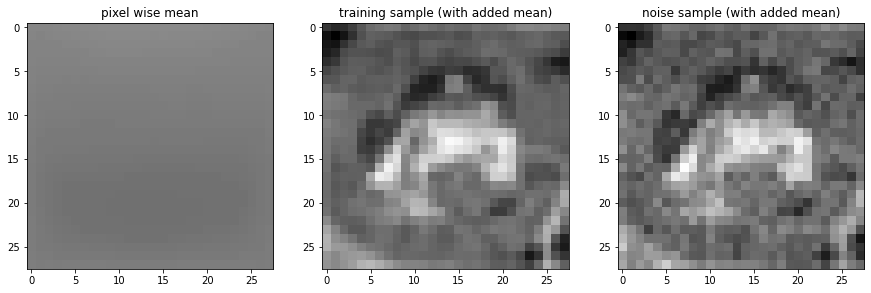

In [7]:
fig, axs = plt.subplots(1,3, figsize=(15, 15))
axs[0].imshow(cifar_mean.reshape((28 ,28)), cmap='gray', vmin=0, vmax=1)
axs[0].set_title("pixel wise mean")
axs[1].imshow((cifar_mean + cifar_train[0]).reshape((28 ,28)), cmap='gray', vmin=0, vmax=1)
axs[1].set_title("training sample (with added mean)")
axs[2].imshow((cifar_mean + noise_train[0]).reshape((28 ,28)), cmap='gray', vmin=0, vmax=1)
axs[2].set_title("noise sample (with added mean)")

## Train

In [12]:
model, losses = train_cnce(batch_size=1000, cifar10_data_path="../data/", noise_multiplier=0.05,
                           max_steps=10000)

Files already downloaded and verified
Files already downloaded and verified
Loaded 50000 training examples
0: Loss: 2.628185534954249
Evaluating...
	loss avg: 2.7280225321274876	loss std: 0.1183594252082483
100: Loss: 1.2785245897737523
200: Loss: 0.9097351913378745
300: Loss: 0.7481552015251458
400: Loss: 0.6648643299903996
500: Loss: 0.6194682220825078
600: Loss: 0.5844889877100538
700: Loss: 0.556619526735216
800: Loss: 0.5330749729289632
900: Loss: 0.5116668887205291
1000: Loss: 0.4917323947995756
Evaluating...
	loss avg: 0.6522443331038159	loss std: 0.02358829228687256
1100: Loss: 0.473085226109532
1200: Loss: 0.45539206932334086
1300: Loss: 0.43829798557812344
1400: Loss: 0.42166145811875405
1500: Loss: 0.4055284364854682
1600: Loss: 0.3899743623162185
1700: Loss: 0.37502173108403825
1800: Loss: 0.3605995549852677
1900: Loss: 0.34658794725245967
2000: Loss: 0.3328706133536043
Evaluating...
	loss avg: 0.5728242970898304	loss std: 0.023695327012045794
2100: Loss: 0.3193616735679188

Text(0, 0.5, 'negative cNCE loss')

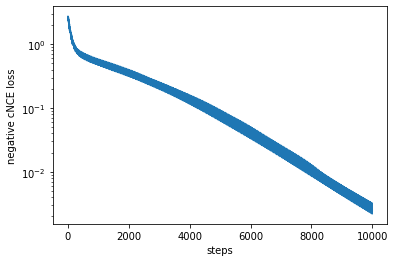

In [21]:
plt.plot(losses)
plt.yscale("log")
plt.xlabel("steps")
plt.ylabel("negative cNCE loss")

## Inspect and evaluate

In [13]:
def plot_filters(V):
    num_filters = V.shape[0]
    num_columns = 8
    num_rows = num_filters // num_columns
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))
    for k in range(num_filters):
        axs[k // num_columns, k % num_columns].imshow(V[k].reshape((28 ,28)), cmap='gray')
        
def evaluate(samples):
    log_probs = model(torch.tensor(samples, device=device)).cpu().detach().numpy()
    print(f"Mean log_p_theta(x): {log_probs.mean()}")
    print(f"Std log_p_theta(x): {log_probs.std()}")

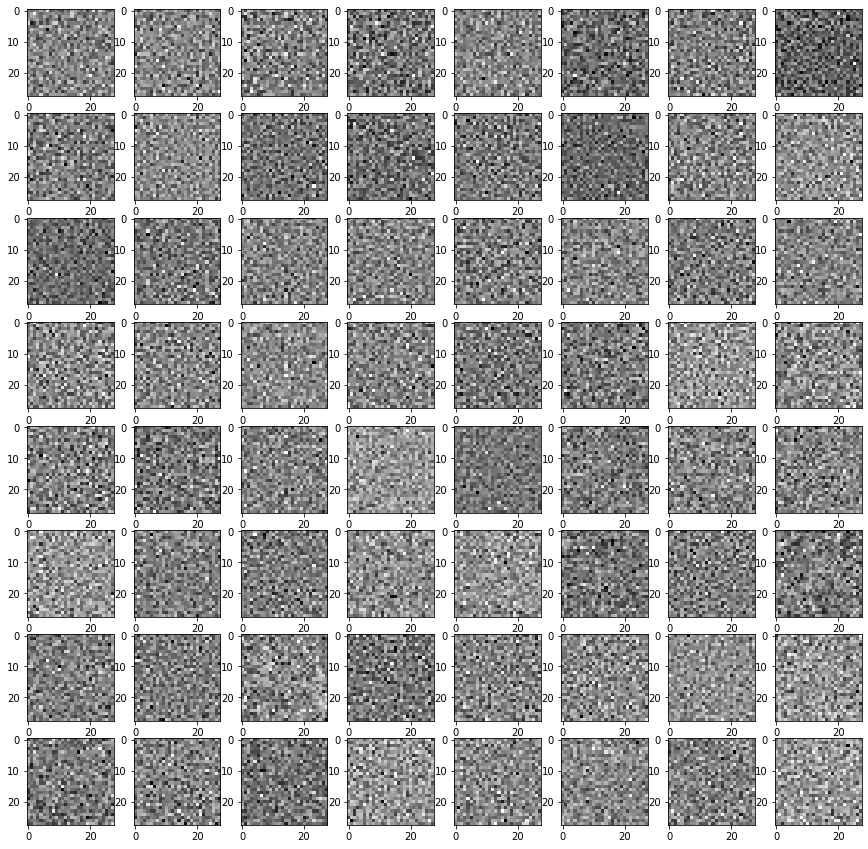

In [14]:
plot_filters(model.V.cpu().detach().numpy())

In [15]:
evaluate(cifar_train)

Mean log_p_theta(x): 211.26131025113358
Std log_p_theta(x): 67.01837717298515


In [16]:
evaluate(cifar_test)

Mean log_p_theta(x): 210.04265092175822
Std log_p_theta(x): 67.60484062679454


In [17]:
evaluate(noise_train)

Mean log_p_theta(x): 200.42337345161454
Std log_p_theta(x): 65.51688876577187


In [19]:
mnist_train, mnist_test, mnist_mean = get_mnist_data("../data")

In [24]:
evaluate(mnist_train)

Mean log_p_theta(x): 112.49588237496752
Std log_p_theta(x): 18.885967675256396
